<h2 align="center">Лабораторна робота №1</h2>
<h5 align="right">Роботу виконав студент групи ФІ-21, Беркута Володимир</h5>
<p><b><i>Тема роботи:</i></b> "Популяційні алгоритми. Розроблення програмного забезпечення знаходження глобальних екстремумів багатовимірних функцій".</p>
<p><b><i>Мета роботи:</i></b> опанувати принципи роботи генетичних алгоритмів, алгоритму оптимізації сірими вовками, розробити власне відповідне програмне забезпечення знаходження глобальних екстремумів у задачах багатовимірної онокритеріальної оптимізації.</p>

### Завдання до лабораторної роботи

- Ознайомитися з теоретичними відомостями до кожного з розглянутих методів й алгоритмів (генетичний алгоритм оптимізації та алгоритм оптимізації зграєю сірих вовків).
- Для генетичного алгоритму всі процеси (схрещування, мутацію та відбір) розглядати лише у двійковому коді. Як варіант, двійковий код (код хромосоми) можна перевести у дійсне число з проміжку $x\in[a; b]$ за формулою: $x = \frac{\text{Dec}(\text{code})}{2^w - 1} \cdot (b-a) + a$, де $w$ - кількість бітів кожної хромосоми (задається у програмі), $\text{Dec}(\text{code})$ - функція переведення двійкового коду (змінна $\text{code}$) хромосоми в десяткове число.
- Розробити програмне забезпечення (мова програмування і середовище розробки за вибором студента) для тестування описаних вище алгоритмів (генетичний алгоритм та алгоритм зграї сірих вовків) на одновимірній тестовій одноекстремальній функції.
- Модифікувати програми так, щоб можна було бачити процес пошуку глобального екстремуму. Тобто потрібно продемонструвати положення популяції на функції на кожній ітерації.
- Модифікувати програми на випадок пошуку глобального екстремуму двовимірної (багатовимірної) функції. Також показати процес пошуку глобального екстремуму. Тобто потрібно продемонструвати положення популяції на функції на кожній ітерації. Показати зміну положення популяції на контурному графіку для двовимірних функцій.
- Для багатовимірних одноекстремальних функцій (на прикладі функції Растринга при $n\geq 3$) показати лише графік пристосованості популяції (за критерієм значення функції кожного елемента популяції), а також показати графік відстані від кращого елемента популяції (значення функції) до відомого оптимального значення функції, яке вказане. Тобто останньому в графіку по осі абсцис відкладається номер ітерації, а по осі ординат - найменше значення відстані між оптимальним значенням функції і кращим.
- Обрати будь-яку іншу з функцій, що не наведені у даній лабораторній роботі, знайти її глобальний екстремум, продемонструвати відповідні результати.
- Зробити висновки до отриманих результатів.
- Зробити звіт у PDF-форматі з результатами виконання лабораторної роботи і завантажити його до Classroom.
-Захистити лабораторну роботу у викладача.

In [99]:
import matplotlib.pyplot as plt
import numpy as np
import imageio
import random
import os

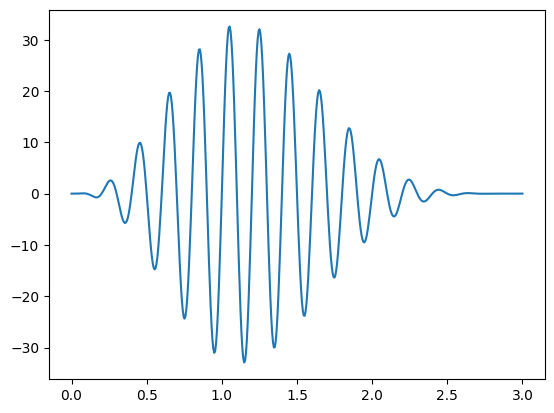

In [100]:
X_1d = np.linspace(0, 3, 500)
Y_1d = []

def fitness_function(x):
    return x**3 * (3 - x)**5 * np.sin(10*np.pi*x)

for x in X_1d:
    Y_1d.append(fitness_function(x))

plt.plot(X_1d, Y_1d)

In [101]:
def create_initial_population(population_size, chromosome_length):
    return np.random.randint(1 << chromosome_length, size=population_size)

def select_parents(populations, fitnesses, tournament_size=3):
    selected = []
    for _ in range(len(populations)):
        tournament = random.sample(list(zip(populations, fitnesses)), tournament_size)
        winner = max(tournament, key=lambda x: x[1])[0]
        selected.append(winner)
    return selected

def crossover(parent1, parent2, chromosome_length):
    cross = np.random.randint(1, chromosome_length - 1)
    child1 = ((parent1 >> cross) << cross) ^ (parent2 & ((1 << cross) - 1))
    child2 = ((parent2 >> cross) << cross) ^ (parent1 & ((1 << cross) - 1))
    return child1, child2

def mutation(individual, mutation_rate, chromosome_length):
    for i in range(chromosome_length):
        if np.random.random() < mutation_rate:
            individual ^= 1 << i
    return individual

def genetic_algorithm(population_size: int, chromosome_length: int, generations: int, mutation_rate: float, a: float, b: float):
    
    def fitness_function(p):
        x = p / (2 << chromosome_length - 1) * (b - a) + a
        return x**3 * (3 - x)**5 * np.sin(10*np.pi*x)
    
    populations = create_initial_population(population_size, chromosome_length)
    images = []
    
    x_values = np.linspace(a, b, 1000)
    for generation in range(generations):
        fitnesses = [fitness_function(p) for p in populations]
        
        best_individual = max(populations, key=fitness_function)
        best_fitness = fitness_function(best_individual)
        
        print(f"Generation: {generation}|BI: {best_individual / (2 << chromosome_length - 1) * (b - a) + a}, BF: {best_fitness}")
        

        y_values = [x**3 * (3 - x)**5 * np.sin(10*np.pi*x) for x in x_values]
        
        plt.figure()
        plt.plot(x_values, y_values, label="Fitness Function")
        population_x = [p / (2 << chromosome_length - 1) * (b - a) + a for p in populations]
        population_y = [fitness_function(p) for p in populations]
        plt.scatter(population_x, population_y, color='red', label="Population")
        plt.title(f"Generation {generation}")
        plt.xlabel("x")
        plt.ylabel("Fitness")
        plt.legend()
        
        
        filename = f"generation_{generation}.png"
        plt.savefig(filename)
        plt.close()
        
        
        images.append(imageio.imread(filename))
        
        populations = select_parents(populations, fitnesses)
        
        next_populations = []
        for i in range(0, population_size, 2):
            parent1 = populations[i]
            parent2 = populations[i+1]
            
            child1, child2 = crossover(parent1, parent2, chromosome_length)
            
            next_populations.append(mutation(child1, mutation_rate, chromosome_length))
            next_populations.append(mutation(child2, mutation_rate, chromosome_length))
        
        next_populations[0] = best_individual
        populations = next_populations
    
    
    imageio.mimsave('genetic_algorithm.gif', images, fps=2)
    
    
    for filename in [f"generation_{i}.png" for i in range(generations)]:
        os.remove(filename)

population_size = 20
chromosome_length = 16
generations = 50
mutation_rate = 0.1
a = 0
b = 3

genetic_algorithm(population_size, chromosome_length, generations, mutation_rate, a, b)

Generation: 0|BI: 1.034912109375, BF: 28.899351525747424
Generation: 1|BI: 1.0398101806640625, BF: 30.8822636158633
Generation: 2|BI: 1.0398101806640625, BF: 30.8822636158633
Generation: 3|BI: 1.0398101806640625, BF: 30.8822636158633


C:\Users\berku\AppData\Local\Temp\ipykernel_24456\2651423731.py:61: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Generation: 4|BI: 1.0500640869140625, BF: 32.639855413627735
Generation: 5|BI: 1.0500640869140625, BF: 32.639855413627735
Generation: 6|BI: 1.0500640869140625, BF: 32.639855413627735
Generation: 7|BI: 1.0504302978515625, BF: 32.64042995577746
Generation: 8|BI: 1.0504302978515625, BF: 32.64042995577746
Generation: 9|BI: 1.0504302978515625, BF: 32.64042995577746
Generation: 10|BI: 1.0504302978515625, BF: 32.64042995577746
Generation: 11|BI: 1.0504302978515625, BF: 32.64042995577746
Generation: 12|BI: 1.0504302978515625, BF: 32.64042995577746
Generation: 13|BI: 1.0504302978515625, BF: 32.64042995577746
Generation: 14|BI: 1.0504302978515625, BF: 32.64042995577746
Generation: 15|BI: 1.0504302978515625, BF: 32.64042995577746
Generation: 16|BI: 1.0504302978515625, BF: 32.64042995577746
Generation: 17|BI: 1.0503387451171875, BF: 32.64069304133044
Generation: 18|BI: 1.05029296875, BF: 32.640722899243954
Generation: 19|BI: 1.05029296875, BF: 32.640722899243954
Generation: 20|BI: 1.05029296875, B

In [102]:
def gwo(size, max_iterations, speed, a, b):
    wolfs_positions = np.random.uniform(a, b, size)
    wolfs_speed = np.random.uniform(0.7*speed, 1.3*speed, size)
    
    def ffunction(x):
        return x**3 * (3 - x)**5 * np.sin(10*np.pi*x)
    
    fitness_value = [ffunction(x) for x in wolfs_positions]
    wolfs = [list(x) for x in zip(wolfs_positions, wolfs_speed, fitness_value)]
    
    images = []
    
    x_values = np.linspace(a, b, 1000)
    for iter in range(max_iterations):
        GBest = max(wolfs, key=lambda x: x[2])
        print(f"Iteration:{iter}\nGBest:{GBest[0]}\nvalue:{GBest[2]}\n\n")
        
        y_values = [x**3 * (3 - x)**5 * np.sin(10*np.pi*x) for x in x_values]
        
        plt.figure()
        plt.plot(x_values, y_values, label="Fitness Function")
        plt.scatter([x[0] for x in wolfs], [x[2] for x in wolfs], color='red', label="Wolfs")
        plt.scatter(GBest[0], GBest[2], color='blue', label="GBest")
        plt.title(f"Iteration {iter}")
        plt.xlabel("x")
        plt.ylabel("Fitness")
        plt.legend()
        
        filename = f"iter_{iter}.png"
        plt.savefig(filename)
        plt.close()
        
        images.append(imageio.imread(filename))
        
        for w in wolfs:
            if w != GBest:
                w[0] += w[1] * (GBest[0] - w[0])/abs(GBest[0] - w[0])
                w[2] = ffunction(w[0])
    
    imageio.mimsave('gwo_algorithm.gif', images, fps=6)
    for filename in [f"iter_{i}.png" for i in range(max_iterations)]:
        os.remove(filename)

In [103]:
gwo(10, 200, 0.005, 0, 3)

Iteration:0
GBest:1.6187954003148475
value:11.872182079541565


Iteration:1
GBest:1.6187954003148475
value:11.872182079541565


Iteration:2
GBest:1.8593754593277927
value:11.876755062745573




C:\Users\berku\AppData\Local\Temp\ipykernel_24456\2496266149.py:33: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Iteration:3
GBest:1.6246045494327856
value:14.736789792146359


Iteration:4
GBest:1.6246045494327856
value:14.736789792146359


Iteration:5
GBest:1.6246045494327856
value:14.736789792146359


Iteration:6
GBest:1.4225363006978422
value:18.28565772669659


Iteration:7
GBest:1.4225363006978422
value:18.28565772669659


Iteration:8
GBest:1.4225363006978422
value:18.28565772669659


Iteration:9
GBest:1.4225363006978422
value:18.28565772669659


Iteration:10
GBest:1.4225363006978422
value:18.28565772669659


Iteration:11
GBest:1.4225363006978422
value:18.28565772669659


Iteration:12
GBest:1.4225363006978422
value:18.28565772669659


Iteration:13
GBest:1.4225363006978422
value:18.28565772669659


Iteration:14
GBest:1.4225363006978422
value:18.28565772669659


Iteration:15
GBest:1.4225363006978422
value:18.28565772669659


Iteration:16
GBest:1.0225243363460375
value:21.01404122766157


Iteration:17
GBest:1.0225243363460375
value:21.01404122766157


Iteration:18
GBest:1.0225243363460375
value:

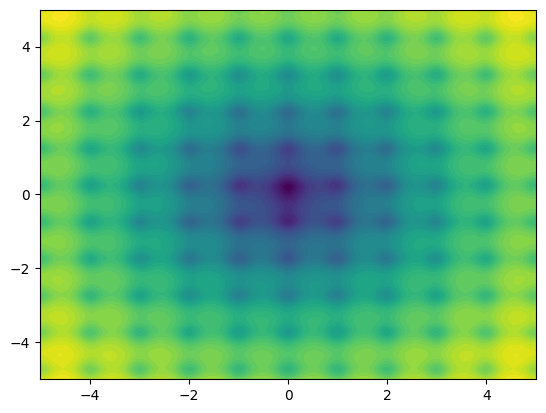

In [104]:
from matplotlib import cm

def function_2d(x, y):
    # -5 <= x | y <= 5
    return -20 * np.power(np.e, -0.2 * np.sqrt(0.5 * (x**2 + y**2))) - np.power(np.e, 0.5 * (np.cos(2*np.pi*x) + np.sin(2*np.pi*y))) + np.e +20

X = np.linspace(-5, 5, 1000)
Y = np.linspace(-5, 5, 1000)
X, Y = np.meshgrid(X, Y)
Z = function_2d(X, Y)

plt.contourf(X, Y, Z, levels=50, cmap='viridis')

In [105]:
def create_initial_population_2d(population_size, chromosome_length):
    return np.random.randint(1 << chromosome_length, size=(population_size, 2))

def select_parents_2d(populations, fitnesses, tournament_size=3):
    selected = []
    for _ in range(len(populations)):
        tournament = random.sample(list(zip(populations, fitnesses)), tournament_size)
        winner = max(tournament, key=lambda x: x[1])[0]
        selected.append(winner)
    return selected

def crossover_2d(parent1, parent2, chromosome_length):
    cross = np.random.randint(1, chromosome_length - 1)
    
    child1 = (((parent1[0] >> cross) << cross) ^ (parent2[0] & ((1 << cross) - 1)), 
              ((parent1[1] >> cross) << cross) ^ (parent2[1] & ((1 << cross) - 1)))
    
    child2 = (((parent2[0] >> cross) << cross) ^ (parent1[0] & ((1 << cross) - 1)), 
              ((parent1[1] >> cross) << cross) ^ (parent2[1] & ((1 << cross) - 1)))
    return child1, child2

def mutation_2d(individual, mutation_rate, chromosome_length):
    individual = list(individual)
    for i in range(chromosome_length):
        if np.random.random() < mutation_rate:
            individual[0] ^= 1 << i
        if np.random.random() < mutation_rate:
            individual[1] ^= 1 << i
    return tuple(individual)

def genetic_algorithm_2d(population_size: int, chromosome_length: int, generations: int, mutation_rate: float, a: float, b: float):
    
    def fitness_function_2d(p):
        
        x = p[0] / (2 << chromosome_length - 1) * (b - a) + a
        y = p[1] / (2 << chromosome_length - 1) * (b - a) + a
        
        return -20 * np.power(np.e, -0.2 * np.sqrt(0.5 * (x**2 + y**2))) - np.power(np.e, 0.5 * (np.cos(2*np.pi*x) + np.sin(2*np.pi*y))) + np.e +20
    
    populations = create_initial_population_2d(population_size, chromosome_length)
    images = []
    
    x_values = np.linspace(a, b, 1000)
    for generation in range(generations):
        fitnesses = [-fitness_function_2d(p) for p in populations]
        
        best_individual = max(populations, key=lambda x: -fitness_function_2d(x))
        best_fitness = fitness_function_2d(best_individual)
        
        print(f"Generation 2D: {generation}|BI: {best_individual}, BF: {best_fitness}")
        
        plt.figure()
        plt.contourf(X, Y, Z, levels=50, cmap='viridis')
        population_x = [p[0] / (2 << chromosome_length - 1) * (b - a) + a for p in populations]
        population_y = [p[1] / (2 << chromosome_length - 1) * (b - a) + a for p in populations]
        plt.scatter(population_x, population_y, color='red', label="Population")
        plt.title(f"Generation 2D {generation}")
        plt.legend()
        
        
        filename = f"generation_2d_{generation}.png"
        plt.savefig(filename)
        plt.close()
        
        
        images.append(imageio.imread(filename))
        
        populations = select_parents_2d(populations, fitnesses)
        
        next_populations = []
        for i in range(0, population_size, 2):
            parent1 = populations[i]
            parent2 = populations[i+1]
            
            child1, child2 = crossover_2d(parent1, parent2, chromosome_length)
            
            next_populations.append(mutation_2d(child1, mutation_rate, chromosome_length))
            next_populations.append(mutation_2d(child2, mutation_rate, chromosome_length))
        
        next_populations[0] = best_individual
        populations = next_populations
    
    
    imageio.mimsave('genetic_2d_algorithm.gif', images, fps=2)
    
    
    for filename in [f"generation_2d_{i}.png" for i in range(generations)]:
        os.remove(filename)

population_size = 50
chromosome_length = 8
generations = 50
mutation_rate = 0.01
a = -5
b = 5

genetic_algorithm_2d(population_size, chromosome_length, generations, mutation_rate, a, b)

Generation 2D: 0|BI: [131 111], BF: 2.3133647395772385


C:\Users\berku\AppData\Local\Temp\ipykernel_24456\4002299788.py:66: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Generation 2D: 1|BI: (np.int32(128), np.int32(110)), BF: 1.950956970563098
Generation 2D: 2|BI: (np.int32(128), np.int32(110)), BF: 1.950956970563098
Generation 2D: 3|BI: (np.int32(128), np.int32(126)), BF: 1.6355154591923977
Generation 2D: 4|BI: (np.int32(128), np.int32(127)), BF: 1.3683553719608845
Generation 2D: 5|BI: (np.int32(128), np.int32(127)), BF: 1.3683553719608845
Generation 2D: 6|BI: (np.int32(128), np.int32(127)), BF: 1.3683553719608845
Generation 2D: 7|BI: (np.int32(128), np.int32(127)), BF: 1.3683553719608845
Generation 2D: 8|BI: (np.int32(128), np.int32(127)), BF: 1.3683553719608845
Generation 2D: 9|BI: (np.int32(128), np.int32(127)), BF: 1.3683553719608845
Generation 2D: 10|BI: (np.int32(128), np.int32(127)), BF: 1.3683553719608845
Generation 2D: 11|BI: (np.int32(128), np.int32(127)), BF: 1.3683553719608845
Generation 2D: 12|BI: (np.int32(128), np.int32(127)), BF: 1.3683553719608845
Generation 2D: 13|BI: (np.int32(128), np.int32(127)), BF: 1.3683553719608845
Generation

In [106]:
def gwo_2d(size, max_iterations, speed, a, b):
    wolfs_position_x = np.random.uniform(a, b, size)
    wolfs_position_y = np.random.uniform(a, b, size)
    wolfs_speed = np.random.uniform(0.7*speed, 1.3*speed, size)
    
    def ffunction(w):
        x = w[0]
        y = w[1]
        return -20 * np.power(np.e, -0.2 * np.sqrt(0.5 * (x**2 + y**2))) - np.power(np.e, 0.5 * (np.cos(2*np.pi*x) + np.sin(2*np.pi*y))) + np.e +20
    
    fitness_value = [-ffunction(x) for x in zip(wolfs_position_x, wolfs_position_y)]
    wolfs = [list(x) for x in zip(wolfs_position_x, wolfs_position_y, wolfs_speed, fitness_value)]
    wolfs = np.array(wolfs)
    images = []
    
    for iter in range(max_iterations):
        GBest = max(wolfs, key=lambda x: x[3])
        print(f"Iteration 2D:{iter}\nGBest:{GBest[:2]}\nvalue:{GBest[3]}\n\n")
        
        plt.figure()
        plt.contourf(X, Y, Z, levels=50, cmap='viridis')
        plt.scatter([x[0] for x in wolfs], [x[1] for x in wolfs], color='red', label="Wolfs")
        plt.scatter(GBest[0], GBest[1], color='blue', label="GBest")
        plt.title(f"2D Iteration {iter}")
        plt.legend()
        
        filename = f"iter_2d_{iter}.png"
        plt.savefig(filename)
        plt.close()
        
        images.append(imageio.imread(filename))
        
        for w in wolfs:
            if (w != GBest).all():
                w[:2] += w[2] * (GBest[:2] - w[:2])/(np.linalg.norm(GBest[:2] - w[:2]))
                w[3] = -ffunction(w)
    
    imageio.mimsave('gwo_2d_algorithm.gif', images, fps=6)
    for filename in [f"iter_2d_{i}.png" for i in range(max_iterations)]:
        os.remove(filename)

In [107]:
gwo_2d(10, 200, 0.05, -5, 5)

Iteration 2D:0
GBest:[ 0.05344733 -1.42569931]
value:-5.092334605434324




C:\Users\berku\AppData\Local\Temp\ipykernel_24456\2988207291.py:31: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Iteration 2D:1
GBest:[ 0.05344733 -1.42569931]
value:-5.092334605434324


Iteration 2D:2
GBest:[ 0.05344733 -1.42569931]
value:-5.092334605434324


Iteration 2D:3
GBest:[ 0.05344733 -1.42569931]
value:-5.092334605434324


Iteration 2D:4
GBest:[ 0.05344733 -1.42569931]
value:-5.092334605434324


Iteration 2D:5
GBest:[ 0.05344733 -1.42569931]
value:-5.092334605434324


Iteration 2D:6
GBest:[ 0.05344733 -1.42569931]
value:-5.092334605434324


Iteration 2D:7
GBest:[ 0.05344733 -1.42569931]
value:-5.092334605434324


Iteration 2D:8
GBest:[ 0.05344733 -1.42569931]
value:-5.092334605434324


Iteration 2D:9
GBest:[ 0.05344733 -1.42569931]
value:-5.092334605434324


Iteration 2D:10
GBest:[ 0.05344733 -1.42569931]
value:-5.092334605434324


Iteration 2D:11
GBest:[ 0.05344733 -1.42569931]
value:-5.092334605434324


Iteration 2D:12
GBest:[ 0.05344733 -1.42569931]
value:-5.092334605434324


Iteration 2D:13
GBest:[ 0.05344733 -1.42569931]
value:-5.092334605434324


Iteration 2D:14
GBest:[ 0.05344733

In [108]:
def rastrigin(x, y, z):
    return 30 + (x**2 - 10*np.cos(2*np.pi*x)) + (y**2 - 10*np.cos(2*np.pi*y)) + (z**2 - 10*np.cos(2*np.pi*z))

X_r = np.linspace(-5.12, 5.12, 1000)
min(rastrigin(X_r, X_r, X_r))

np.float64(0.015632095800651058)

Generation 2D: 0|BI: [179 131 158], BF: 15.55031217075011
Generation 2D: 1|BI: (np.int32(157), np.int32(150), np.int32(151)), BF: 11.5553789755573
Generation 2D: 2|BI: (np.int32(157), np.int32(150), np.int32(151)), BF: 11.5553789755573
Generation 2D: 3|BI: (np.int32(176), np.int32(150), np.int32(151)), BF: 10.491380124908634
Generation 2D: 4|BI: (np.int32(128), np.int32(150), np.int32(151)), BF: 5.568046925347262
Generation 2D: 5|BI: (np.int32(128), np.int32(150), np.int32(151)), BF: 5.568046925347262
Generation 2D: 6|BI: (np.int32(128), np.int32(150), np.int32(151)), BF: 5.568046925347262
Generation 2D: 7|BI: (np.int32(128), np.int32(150), np.int32(151)), BF: 5.568046925347262
Generation 2D: 8|BI: (np.int32(128), np.int32(150), np.int32(151)), BF: 5.568046925347262
Generation 2D: 9|BI: (np.int32(128), np.int32(151), np.int32(151)), BF: 4.166666399122739
Generation 2D: 10|BI: (np.int32(128), np.int32(151), np.int32(151)), BF: 4.166666399122739
Generation 2D: 11|BI: (np.int32(128), np.i

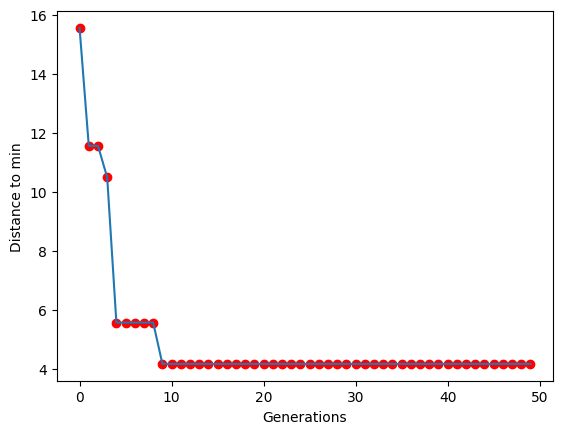

In [109]:
def create_initial_population_3d(population_size, chromosome_length):
    return np.random.randint(1 << chromosome_length, size=(population_size, 3))

def select_parents_3d(populations, fitnesses, tournament_size=3):
    selected = []
    for _ in range(len(populations)):
        tournament = random.sample(list(zip(populations, fitnesses)), tournament_size)
        winner = max(tournament, key=lambda x: x[1])[0]
        selected.append(winner)
    return selected

def crossover_3d(parent1, parent2, chromosome_length):
    cross = np.random.randint(1, chromosome_length - 1)
    
    child1 = (((parent1[0] >> cross) << cross) ^ (parent2[0] & ((1 << cross) - 1)), 
              ((parent1[1] >> cross) << cross) ^ (parent2[1] & ((1 << cross) - 1)), 
              ((parent1[2] >> cross) << cross) ^ (parent2[2] & ((1 << cross) - 1)))
    
    child2 = (((parent2[0] >> cross) << cross) ^ (parent1[0] & ((1 << cross) - 1)), 
              ((parent1[1] >> cross) << cross) ^ (parent2[1] & ((1 << cross) - 1)), 
              ((parent1[2] >> cross) << cross) ^ (parent2[2] & ((1 << cross) - 1)))
    return child1, child2

def mutation_3d(individual, mutation_rate, chromosome_length):
    individual = list(individual)
    for i in range(chromosome_length):
        if np.random.random() < mutation_rate:
            individual[0] ^= 1 << i
        if np.random.random() < mutation_rate:
            individual[1] ^= 1 << i
        if np.random.random() < mutation_rate:
            individual[0] ^= 1 << i
    return tuple(individual)


def genetic_algorithm_3d(population_size: int, chromosome_length: int, generations: int, mutation_rate: float, a: float, b: float):
    
    def fitness_function_3d(p):
        
        x = p[0] / (2 << chromosome_length - 1) * (b - a) + a
        y = p[1] / (2 << chromosome_length - 1) * (b - a) + a
        z = p[2] / (2 << chromosome_length - 1) * (b - a) + a
        
        return 30 + (x**2 - 10*np.cos(2*np.pi*x)) + (y**2 - 10*np.cos(2*np.pi*y)) + (z**2 - 10*np.cos(2*np.pi*z))
    
    populations = create_initial_population_3d(population_size, chromosome_length)
    Y = []
    
    for generation in range(generations):
        fitnesses = [-fitness_function_3d(p) for p in populations]
        
        best_individual = max(populations, key=lambda x: -fitness_function_3d(x))
        best_fitness = fitness_function_3d(best_individual)
        
        Y.append(abs(0 - best_fitness))
        print(f"Generation 2D: {generation}|BI: {best_individual}, BF: {best_fitness}")
        
        
        populations = select_parents_3d(populations, fitnesses)
        
        next_populations = []
        for i in range(0, population_size, 2):
            parent1 = populations[i]
            parent2 = populations[i+1]
            
            child1, child2 = crossover_3d(parent1, parent2, chromosome_length)
            
            next_populations.append(mutation_3d(child1, mutation_rate, chromosome_length))
            next_populations.append(mutation_3d(child2, mutation_rate, chromosome_length))
        
        next_populations[0] = best_individual
        populations = next_populations
    
    plt.plot(list(range(generations)), Y)
    plt.scatter(list(range(generations)), Y, color="red")
    plt.xlabel("Generations")
    plt.ylabel("Distance to min")
    

population_size = 50
chromosome_length = 8
generations = 50
mutation_rate = 0.01
a = -5.12
b = 5.12

genetic_algorithm_3d(population_size, chromosome_length, generations, mutation_rate, a, b)

In [110]:
def gwo_3d(size, max_iterations, speed, a, b):
    wolfs_position_x = np.random.uniform(a, b, size)
    wolfs_position_y = np.random.uniform(a, b, size)
    wolfs_position_z = np.random.uniform(a, b, size)
    wolfs_speed = np.random.uniform(0.7*speed, 1.3*speed, size)
    
    def ffunction(w):
        x = w[0]
        y = w[1]
        z = w[2]
        return 30 + (x**2 - 10*np.cos(2*np.pi*x)) + (y**2 - 10*np.cos(2*np.pi*y)) + (z**2 - 10*np.cos(2*np.pi*z))
    
    fitness_value = [-ffunction(w) for w in zip(wolfs_position_x, wolfs_position_y, wolfs_position_z)]
    wolfs = [list(x) for x in zip(wolfs_position_x, wolfs_position_y, wolfs_position_z, wolfs_speed, fitness_value)]
    wolfs = np.array(wolfs)
    
    Y = []
    
    for iter in range(max_iterations):
        GBest = max(wolfs, key=lambda x: x[4])
        Y.append(abs(GBest[4]))
        print(f"Iteration rastrigin:{iter}\nGBest:{GBest[:3]}\nvalue:{GBest[4]}\n\n")
        
        for w in wolfs:
            if (w != GBest).all():
                w[:3] += w[3] * (GBest[:3] - w[:3])/(np.linalg.norm(GBest[:3] - w[:3]))
                w[4] = -ffunction(w)
    
    plt.plot(list(range(max_iterations)), Y)
    plt.scatter(list(range(max_iterations)), Y, color="red")
    plt.xlabel("Iterations")
    plt.ylabel("Distance to min")
    

Iteration rastrigin:0
GBest:[ 2.18278214 -1.90028174  3.08405372]
value:-27.0499191414342


Iteration rastrigin:1
GBest:[3.95508086 1.0643338  2.97625913]
value:-26.946196179526936


Iteration rastrigin:2
GBest:[3.95508086 1.0643338  2.97625913]
value:-26.946196179526936


Iteration rastrigin:3
GBest:[3.95508086 1.0643338  2.97625913]
value:-26.946196179526936


Iteration rastrigin:4
GBest:[3.95508086 1.0643338  2.97625913]
value:-26.946196179526936


Iteration rastrigin:5
GBest:[3.95508086 1.0643338  2.97625913]
value:-26.946196179526936


Iteration rastrigin:6
GBest:[3.95508086 1.0643338  2.97625913]
value:-26.946196179526936


Iteration rastrigin:7
GBest:[3.95508086 1.0643338  2.97625913]
value:-26.946196179526936


Iteration rastrigin:8
GBest:[3.95508086 1.0643338  2.97625913]
value:-26.946196179526936


Iteration rastrigin:9
GBest:[3.95508086 1.0643338  2.97625913]
value:-26.946196179526936


Iteration rastrigin:10
GBest:[3.95508086 1.0643338  2.97625913]
value:-26.946196179526936

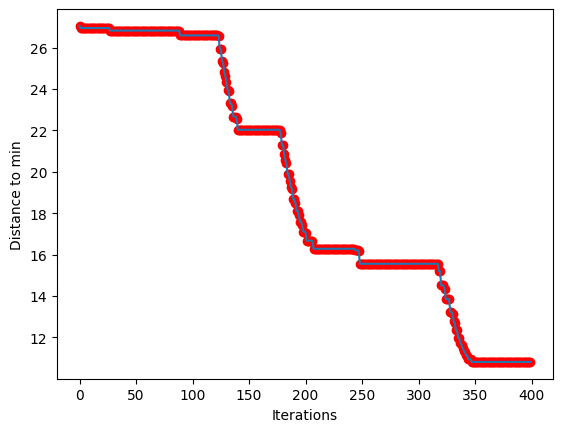

In [111]:
gwo_3d(20, 400, 0.01, -5.12, 5.12)

### Функція Аклі

$f(x) = -20\cdot\text{exp}(-0.2\sqrt{\frac{1}{n}\sum^{n}_{i=1}{x_i^2}}) - \text{exp}(\frac{1}{n}\sum^{n}_{i=1}{cos({2\pi x_i})}) + 20 + e$

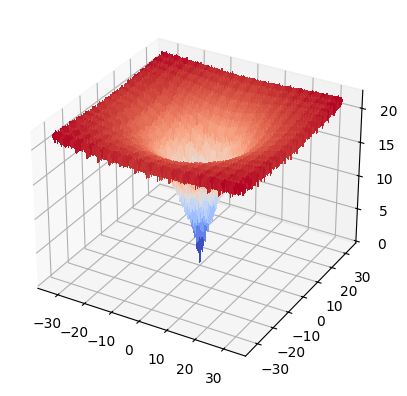

In [112]:
def akli(vec):
    x = vec[0]
    y = vec[1]
    
    term1 = -20*np.exp(-.2 * np.sqrt(x**2 + y**2) / 2)
    term2 = -np.exp((np.cos(2*np.pi*x) + np.cos(2*np.pi*y)) / 2)
    return term1 + term2 + 20 + np.e

X_akli = np.linspace(-32.768, 32.768, 1000)

X_akli, Y_akli = np.meshgrid(X_akli, X_akli)
Z_akli = akli([X_akli, Y_akli])

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

ax.plot_surface(X_akli, Y_akli, Z_akli, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)


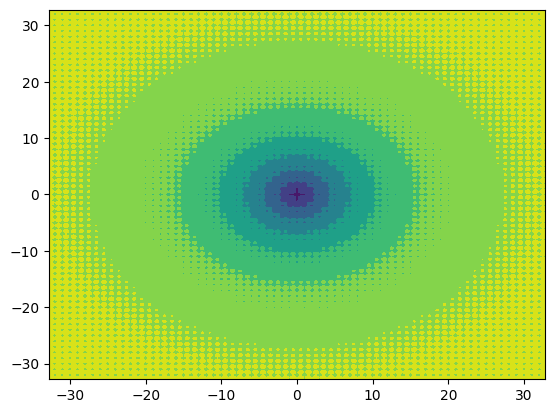

In [113]:
plt.contourf(X_akli, Y_akli, Z_akli)

In [114]:
def genetic_algorithm_2d_akli(population_size: int, chromosome_length: int, generations: int, mutation_rate: float, a: float, b: float):
    
    def fitness_function_2d(p):
        
        x = p[0] / (2 << chromosome_length - 1) * (b - a) + a
        y = p[1] / (2 << chromosome_length - 1) * (b - a) + a
        
        return akli([x, y])
    
    populations = create_initial_population_2d(population_size, chromosome_length)
    images = []
    
    for generation in range(generations):
        fitnesses = [-fitness_function_2d(p) for p in populations]
        
        best_individual = max(populations, key=lambda x: -fitness_function_2d(x))
        best_fitness = fitness_function_2d(best_individual)
        
        print(f"Generation 2D: {generation}|BI: {best_individual}, BF: {best_fitness}")
        
        populations = select_parents_2d(populations, fitnesses)
        
        next_populations = []
        for i in range(0, population_size, 2):
            parent1 = populations[i]
            parent2 = populations[i+1]
            
            child1, child2 = crossover_2d(parent1, parent2, chromosome_length)
            
            next_populations.append(mutation_2d(child1, mutation_rate, chromosome_length))
            next_populations.append(mutation_2d(child2, mutation_rate, chromosome_length))
        
        next_populations[0] = best_individual
        populations = next_populations

population_size = 50
chromosome_length = 16
generations = 50
mutation_rate = 0.01
a = -32.768
b = 32.768

genetic_algorithm_2d_akli(population_size, chromosome_length, generations, mutation_rate, a, b)

Generation 2D: 0|BI: [29185 35369], BF: 9.439616379817888
Generation 2D: 1|BI: (np.int32(29651), np.int32(34345)), BF: 7.684199263459309
Generation 2D: 2|BI: (np.int32(29680), np.int32(34345)), BF: 7.595433433442269
Generation 2D: 3|BI: (np.int32(32077), np.int32(32864)), BF: 2.80660646936855
Generation 2D: 4|BI: (np.int32(32077), np.int32(32864)), BF: 2.80660646936855
Generation 2D: 5|BI: (np.int32(31745), np.int32(32809)), BF: 2.0046901906752166
Generation 2D: 6|BI: (np.int32(32577), np.int32(32873)), BF: 1.3701915890639396
Generation 2D: 7|BI: (np.int32(32577), np.int32(32841)), BF: 1.246485486388345
Generation 2D: 8|BI: (np.int32(32577), np.int32(32808)), BF: 1.1594600526513195
Generation 2D: 9|BI: (np.int32(32577), np.int32(32776)), BF: 1.1221083503277538
Generation 2D: 10|BI: (np.int32(32705), np.int32(32776)), BF: 0.2313532193178216
Generation 2D: 11|BI: (np.int32(32705), np.int32(32776)), BF: 0.2313532193178216
Generation 2D: 12|BI: (np.int32(32707), np.int32(32777)), BF: 0.221

In [115]:
def gwo_2d_akli(size, max_iterations, speed, a, b):
    wolfs_position_x = np.random.uniform(a, b, size)
    wolfs_position_y = np.random.uniform(a, b, size)
    wolfs_speed = np.random.uniform(0.7*speed, 1.3*speed, size)
    
    def ffunction(w):
        x = w[0]
        y = w[1]
        return akli([x, y])
    
    fitness_value = [-ffunction(x) for x in zip(wolfs_position_x, wolfs_position_y)]
    wolfs = [list(x) for x in zip(wolfs_position_x, wolfs_position_y, wolfs_speed, fitness_value)]
    wolfs = np.array(wolfs)
    images = []
    
    for iter in range(max_iterations):
        GBest = max(wolfs, key=lambda x: x[3])
        print(f"Iteration 2D:{iter}\nGBest:{GBest[:2]}\nvalue:{GBest[3]}\n\n")
        
        
        for w in wolfs:
            if (w != GBest).all():
                w[:2] += w[2] * (GBest[:2] - w[:2])/(np.linalg.norm(GBest[:2] - w[:2]))
                w[3] = -ffunction(w)

In [116]:
gwo_2d_akli(30, 200, 0.15, -32.768, 32.768)

Iteration 2D:0
GBest:[ 0.34863047 -4.82184368]
value:-9.454885126752163


Iteration 2D:1
GBest:[ 0.34863047 -4.82184368]
value:-9.454885126752163


Iteration 2D:2
GBest:[ 0.34863047 -4.82184368]
value:-9.454885126752163


Iteration 2D:3
GBest:[ 0.34863047 -4.82184368]
value:-9.454885126752163


Iteration 2D:4
GBest:[ 0.34863047 -4.82184368]
value:-9.454885126752163


Iteration 2D:5
GBest:[ 0.34863047 -4.82184368]
value:-9.454885126752163


Iteration 2D:6
GBest:[ 0.34863047 -4.82184368]
value:-9.454885126752163


Iteration 2D:7
GBest:[ 0.34863047 -4.82184368]
value:-9.454885126752163


Iteration 2D:8
GBest:[ 0.34863047 -4.82184368]
value:-9.454885126752163


Iteration 2D:9
GBest:[ 0.34863047 -4.82184368]
value:-9.454885126752163


Iteration 2D:10
GBest:[ 0.34863047 -4.82184368]
value:-9.454885126752163


Iteration 2D:11
GBest:[ 0.34863047 -4.82184368]
value:-9.454885126752163


Iteration 2D:12
GBest:[ 0.34863047 -4.82184368]
value:-9.454885126752163


Iteration 2D:13
GBest:[ 0.34863047 